In [1]:
#credit to SARBJIT SINGH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
print("Shape for Data is", boston.data.shape) 
print("Shape for Target is", boston.target.shape) 
print("Names of header :\n", boston.feature_names)
print("Dataset description :\n", boston.DESCR)

Shape for Data is (506, 13)
Shape for Target is (506,)
Names of header :
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset description :
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted di

In [4]:
# Create a Pandas Data Frame from this data set

df = pd.DataFrame(boston.data)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [5]:
df.columns = boston.feature_names
df['MEDV'] = boston.target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# Descriptive Statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEEA48C908>,
      dtype=object)

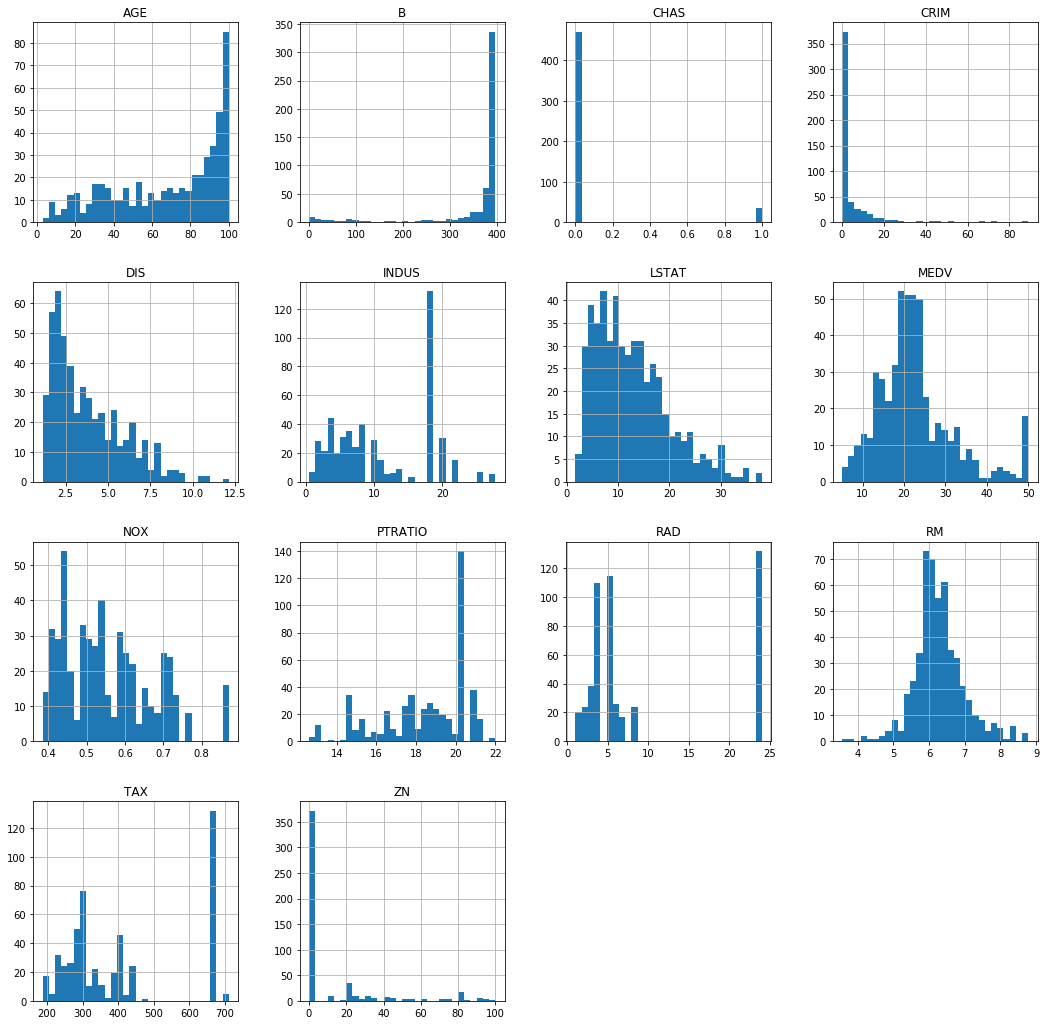

In [9]:
df.hist(bins=30, figsize=(18,18))

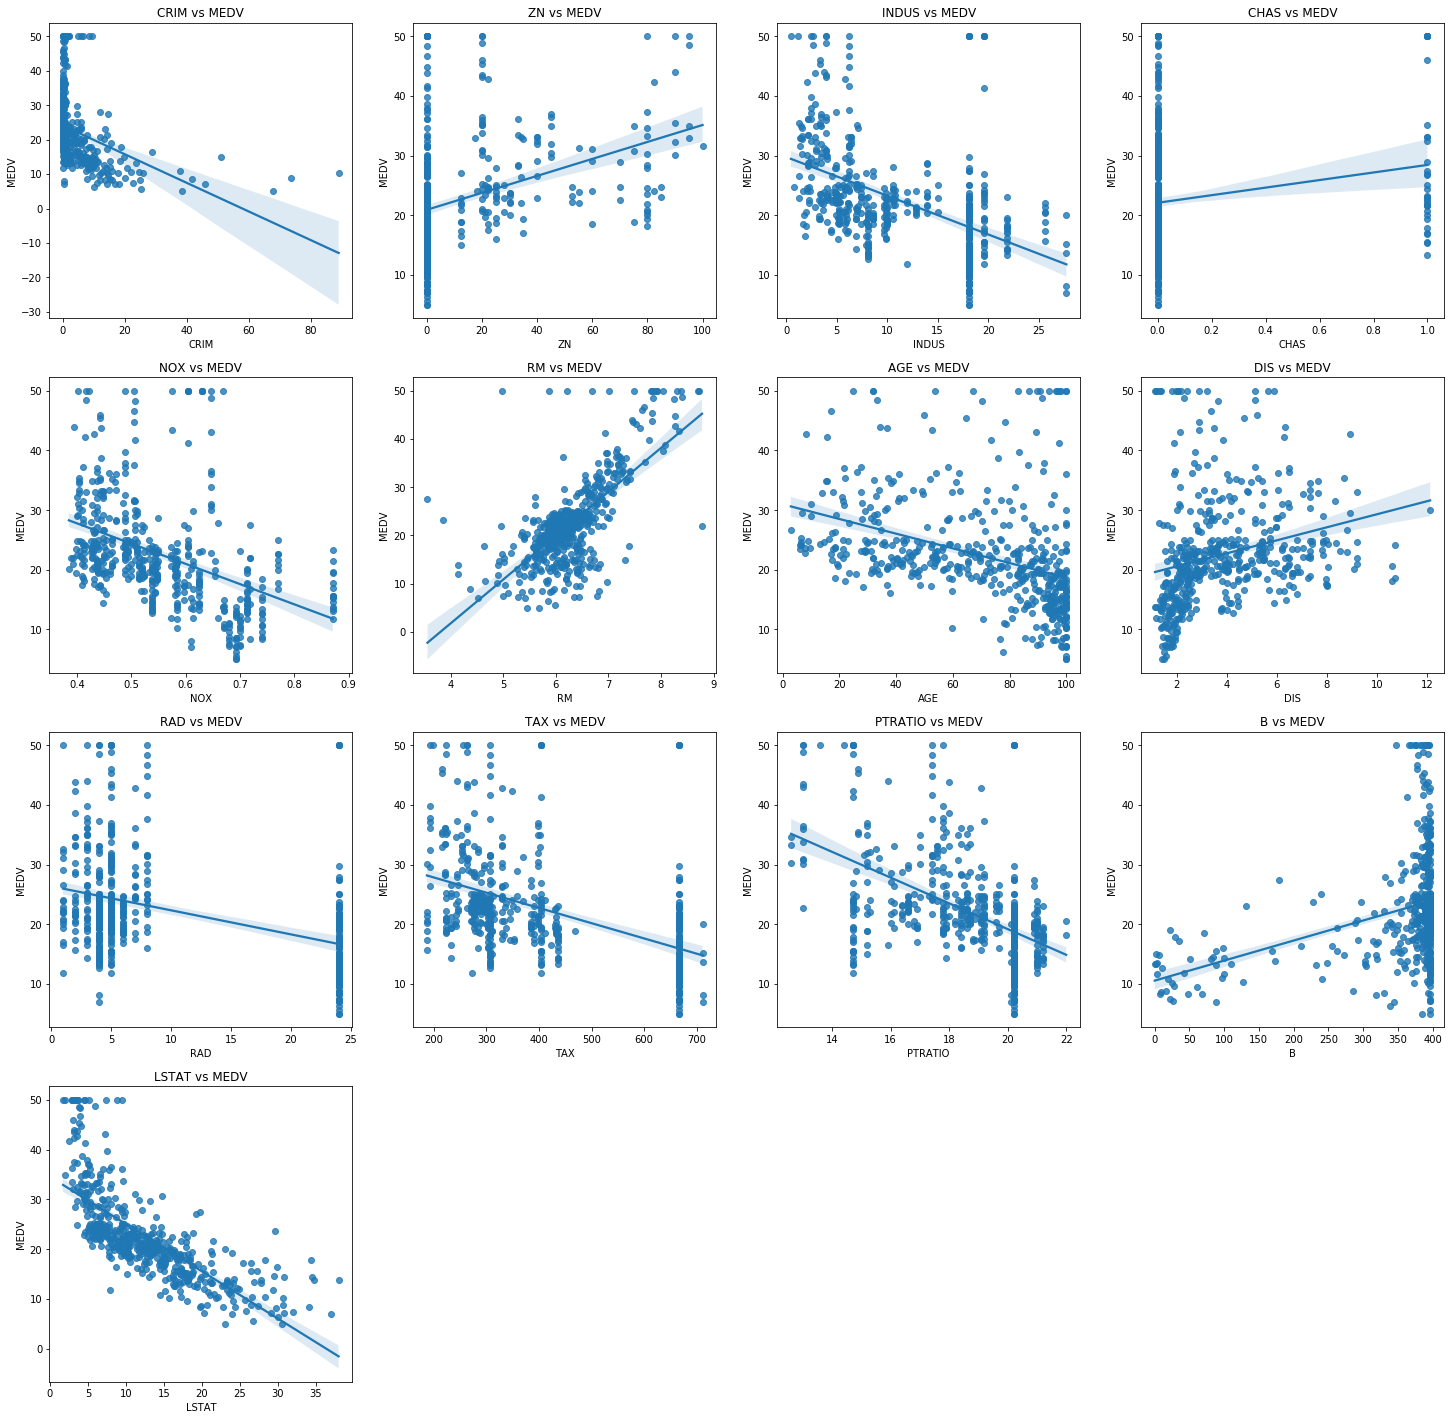

In [10]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(boston.feature_names):
    plt.subplot(4, 4 , i+1)
    sns.regplot(x=col, y='MEDV', data=df)
    plt.title("%s vs MEDV" %(col))

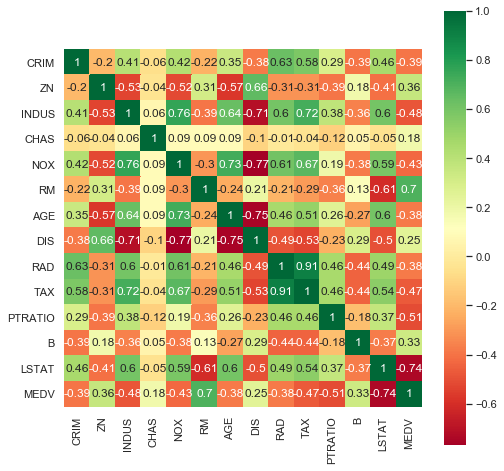

In [11]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(df.corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [12]:
pearson_coef1, p_value1 = stats.pearsonr(df['RM'], df['MEDV'])
print("The Pearson Correlation Coefficient for RM is", pearson_coef1, " with a P-value of P = ", p_value1)  

pearson_coef2, p_value2 = stats.pearsonr(df['LSTAT'], df['MEDV'])
print("The Pearson Correlation Coefficient for LSTAT is", pearson_coef2, " with a P-value of P = ", p_value2) 

print("Is there strong evidence if corelation is signifcant for RM :- ", p_value1 < 0.001) 
print("Is there strong evidence if corelation is signifcant for LSTAT :- ", p_value2 < 0.001)

The Pearson Correlation Coefficient for RM is 0.6953599470715393  with a P-value of P =  2.487228871007442e-74
The Pearson Correlation Coefficient for LSTAT is -0.7376627261740148  with a P-value of P =  5.08110339438697e-88
Is there strong evidence if corelation is signifcant for RM :-  True
Is there strong evidence if corelation is signifcant for LSTAT :-  True


In [13]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression Object
lm1 = LinearRegression()
X1 = df[['RM']]
Y1 = df[['MEDV']] # Target

# Fit (Train) the model
lm1.fit(X1,Y1)

print("Intercept for the model is", lm1.intercept_, "and the scope is",lm1.coef_)

# Prediction
Yout1 = lm1.predict(X1)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout1[0:5])
print("Actual Values:",Y1.values[0:5])

Intercept for the model is [-34.67062078] and the scope is [[9.10210898]]
Predicted Values: [[25.17574577]
 [23.77402099]
 [30.72803225]
 [29.02593787]
 [30.38215211]]
Actual Values: [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


In [14]:
lm2 = LinearRegression()
X2 = df[['RM', 'LSTAT']]
Y2 = df[['MEDV']]

# Fit (Train) the model
lm2.fit(X2,Y2)

print("Intercept for the model is", lm2.intercept_, "and the scope is",lm2.coef_)

# Prediction
Yout2 = lm2.predict(X2)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout2[0:5])
print("Actual Values:",Y2.values[0:5])

Intercept for the model is [-1.35827281] and the scope is [[ 5.09478798 -0.64235833]]
Predicted Values: [[28.94101368]
 [25.48420566]
 [32.65907477]
 [32.40652   ]
 [31.63040699]]
Actual Values: [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


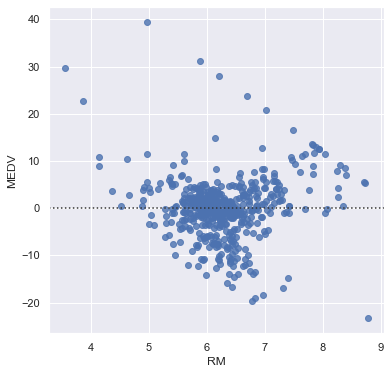

In [15]:
# Seaborn library to be used for Residual Plot
plt.figure(figsize=(6,6))
sns.residplot(df['RM'],df['MEDV'])
plt.show()

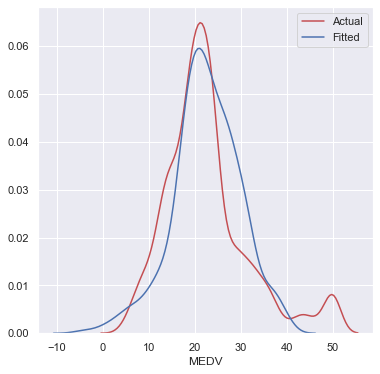

In [16]:
plt.figure(figsize=(6,6))
ax1 = sns.distplot(df['MEDV'], hist=False, color="r", label="Actual")
sns.distplot(Yout2, hist=False, color="b", label="Fitted", ax=ax1)

In [17]:
from sklearn.metrics import mean_squared_error

# Simple Linear Regression

mse1 = mean_squared_error(Y1,Yout1)
print("Mean square error for simple linear regression is",mse1)
print("R-Square value for simple linear regression is", lm1.score(X1,Y1))
print("\n")

# Multiple Linear Regression

mse2 = mean_squared_error(Y2,Yout2)
print("Mean square error for mulitple linear regression is",mse2)
print("R-Square value for multiple linear regression is", lm2.score(X2,Y2))

Mean square error for simple linear regression is 43.60055177116956
R-Square value for simple linear regression is 0.4835254559913343


Mean square error for mulitple linear regression is 30.51246877729947
R-Square value for multiple linear regression is 0.6385616062603403


In [18]:
# First step that we will take is to seperate target data

y_data = df['MEDV']
x_data = df.drop('MEDV',axis=1)

from sklearn.model_selection import train_test_split

# Split the data into test and training (15% as test data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=10)

print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

lm = LinearRegression()

# Fit (Train) the model using the training data 

lm.fit(x_train[['RM','LSTAT']],y_train)

# Prediction using Training Data
yout_train = lm.predict(x_train[['RM','LSTAT']])
print(yout_train[0:5])

# Prediction using Test Data
yout_test = lm.predict(x_test[['RM','LSTAT']])
print(yout_test[0:5])
print("\n")

# Model accuracy using Test Data
mse_test = mean_squared_error(y_test,yout_test)
print("Mean square error is",mse_test)
print("R-Square value using test data is", lm.score(x_test[['RM','LSTAT']],y_test))
print("\n")

# Model accuracy using Training Data
mse_train = mean_squared_error(y_train,yout_train)
print("Mean square error is",mse_train)
print("R-Square value using training data is", lm.score(x_train[['RM','LSTAT']],y_train))

Number of test samples : 76
Number of training samples: 430
[38.74400503  5.69000561 19.41554723 30.26876646 21.13562849]
[26.21310048 29.61955969 27.50797208 29.69508151 17.77881853]


Mean square error is 47.91753944668556
R-Square value using test data is 0.5784951912105682


Mean square error is 27.636206385020866
R-Square value using training data is 0.6375993387266081


In [19]:
from sklearn.model_selection import cross_val_score, KFold

rcross = cross_val_score(lm, x_data, y_data, cv=KFold(n_splits=5,shuffle=True))

print(rcross)
print("The mean of the folds are", rcross.mean())

[0.67492415 0.62392103 0.73687512 0.73802663 0.82791879]
The mean of the folds are 0.7203331428816154
